<a href="https://colab.research.google.com/github/gabrielaleonthiriot/Front-End-Developer/blob/main/Copy_of_Adv_Level_1_Twitter_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting Things Up

## Installing Python Packages

In [1]:
!pip install -q transformers wordcloud matplotlib emoji==0.6.0 tweepy==4.10.1

     |████████████████████████████████| 5.5 MB 6.6 MB/s 
     |████████████████████████████████| 51 kB 2.2 MB/s 
     |████████████████████████████████| 94 kB 1.5 MB/s 
     |████████████████████████████████| 62 kB 570 kB/s 
     |████████████████████████████████| 163 kB 69.5 MB/s 
     |████████████████████████████████| 7.6 MB 38.1 MB/s 


## Connecting to the Twitter API
Note that this users Lydia's Developer Account.

Feel free to create your own credentials after class using this [step-by-step guide](https://developer.twitter.com/en/docs/tutorials/step-by-step-guide-to-making-your-first-request-to-the-twitter-api-v2)!

In [2]:
import tweepy
import requests

# All the credentials
# Note: It's NOT best practice to have your credentials in code!
consumer_key = '516AuumkN6NTumntWZUo0LSlg'
consumer_secret = '0ZFmqTI6D0QYmk2be7LRIbu3PnwaksPS4488jL7topFQK7ze1H'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAGbDiQEAAAAAL7V4t2jC1TYWl5QAXDDTY%2F6uMP0%3D1sD5WQ2dixygP1edAdfUy08tKpikter3ghxkDuScJ7nyNgsB5S'
access_token = '985378590459072512-101ZlCYLZ98ceyrWIC0BLADzG2bs5E6'
access_token_secret = 'VItmuV8nijJThCa3fdXx2Sdk3H1YU9e91FvhUuU2EedpM'

client = tweepy.Client(bearer_token=bearer_token, 
                        consumer_key=consumer_key, 
                        consumer_secret=consumer_secret, 
                        access_token=access_token, 
                        access_token_secret=access_token_secret,
                        return_type = requests.Response, 
                        wait_on_rate_limit=True)

#Search for Tweets
Learn more about building a query for Twitter using [these docs](https://developer.twitter.com/en/docs/twitter-api/tweets/search/integrate/build-a-query)

In [23]:
# Code goes here
query = 'kitten -is:retweet'
search = client.search_recent_tweets(query=query, max_results=100)

#def myFunction(argi):
#  #lines of code
#  return argi
#  my Function ("test")

# Performing Sentiment Analysis
We'll use [a model](https://huggingface.co/finiteautomata/bertweet-base-sentiment-analysis?text=I+like+you.+I+love+you) that's from HuggingFace (an AI open source platform) and the [pipeline class ](https://huggingface.co/docs/transformers/main_classes/pipelines).

In [24]:
# Code goes here
'''
{ 
  key:value
}
'''
tweets_dic = search.json()

tweets_data = tweets_dic['data']

print(tweets_data)

[{'edit_history_tweet_ids': ['1588941241185882112'], 'id': '1588941241185882112', 'text': 'Music Experience: Atomic Kitten https://t.co/lWFlL4QLvk'}, {'edit_history_tweet_ids': ['1588941237843025921'], 'id': '1588941237843025921', 'text': '@k_fonzarelli And yes, the love you feel for a little kitten right away is undeniable 💜'}, {'edit_history_tweet_ids': ['1588941210391019522'], 'id': '1588941210391019522', 'text': 'chef location kitten nationality tower thought\nMAYMAY PUEDE BA\n#MaymayEntrata @maymayentrata07'}, {'edit_history_tweet_ids': ['1588941175951486976'], 'id': '1588941175951486976', 'text': '@Prncss_Kitten Producer of course'}, {'edit_history_tweet_ids': ['1588941149309652992'], 'id': '1588941149309652992', 'text': '(ドラえもん2【TNR保護子猫】残った１匹の子猫を保護しました✴ a fateful encounter with a kitten) \n動画の切れ端 - https://t.co/2qRPlxY8Nd -#Youtube #子猫 #猫'}, {'edit_history_tweet_ids': ['1588941103159332864'], 'id': '1588941103159332864', 'text': "@michaelscat2 Is the mom cat not around for him t

In [25]:
from transformers import pipeline

sentiment_analysis = pipeline(model='finiteautomata/bertweet-base-sentiment-analysis')

tweets = []

for tweet in tweets_data:
  try:
    content = tweet['text'][:128]
    sentiment = sentiment_analysis(content)
    tweets.append({
        'tweet': content,
        'sentiment': sentiment[0]['label']
    })
  except:
    pass

Downloading:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

# Explore the Results with `pandas` and `matplotlib`
[`pandas`](https://pandas.pydata.org/) is a powerful data analysis library that allows us to view and manipulate data.

[`matplotlib`](https://matplotlib.org/) allows us to visualize data with Python.

In [26]:
import pandas as pd

df = pd.DataFrame(tweets)
pd.set_option('display.max_colwidth', None)

display (df[ df['sentiment'] == 'POS' ]. head(1))
display (df[ df['sentiment'] == 'NEU' ]. head(1))
display (df[ df['sentiment'] == 'NEG' ]. head(1))

,tweet,sentiment
1,"@k_fonzarelli And yes, the love you feel for a little kitten right away is undeniable 💜",POS


,tweet,sentiment
0,Music Experience: Atomic Kitten https://t.co/lWFlL4QLvk,NEU


,tweet,sentiment
15,"...I eat my fucking words, I've found a kitten right the fuck outside... CRYING https://t.co/ePVEjBYTkL",NEG


sentiment
NEG    10
NEU    72
POS    15
dtype: int64


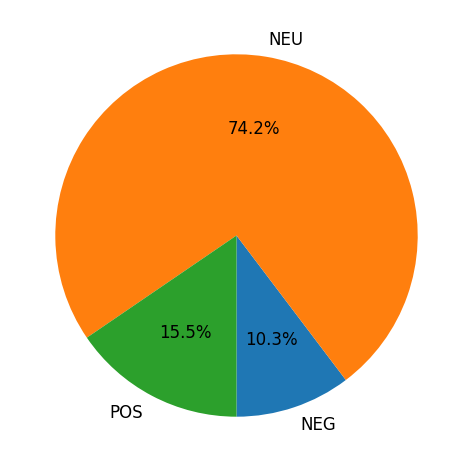

In [29]:
import matplotlib.pyplot as plt

sentiment_counts = df.groupby(['sentiment']).size()
print(sentiment_counts)

fig = plt.figure(figsize=(6,6), dpi=100)
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=270, fontsize=12, label='')

# Generate a Word Cloud
Checkout the [WordCloud docs](https://amueller.github.io/word_cloud/index.html) for more info.

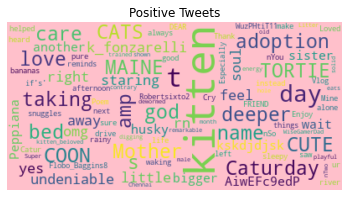

In [31]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

positive_tweets = df['tweet'][df['sentiment'] == 'POS']
stop_words = ['https', 'co', 'RT'] + list(STOPWORDS)
positive_wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='pink', stopwords=stop_words).generate(str(positive_tweets))
plt.figure()
plt.title("Positive Tweets")
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()